In [21]:
import numpy as np
import scipy
import seaborn as sns
import datasets
# import evaluate
import json
from tqdm.notebook import tqdm
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

import utils

In [4]:
train_ds, valid_ds, test_ds = utils.load_dataset()

Found cached dataset civil_comments (/home/johnny/.cache/huggingface/datasets/civil_comments/default/0.9.0/e7a3aacd2ab7d135fa958e7209d10b1fa03807d44c486e3c34897aa08ea8ffab)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /home/johnny/.cache/huggingface/datasets/civil_comments/default/0.9.0/e7a3aacd2ab7d135fa958e7209d10b1fa03807d44c486e3c34897aa08ea8ffab/cache-01f767df1b53d154.arrow
Loading cached processed dataset at /home/johnny/.cache/huggingface/datasets/civil_comments/default/0.9.0/e7a3aacd2ab7d135fa958e7209d10b1fa03807d44c486e3c34897aa08ea8ffab/cache-52cd85a4b8b2e0c8.arrow
Loading cached processed dataset at /home/johnny/.cache/huggingface/datasets/civil_comments/default/0.9.0/e7a3aacd2ab7d135fa958e7209d10b1fa03807d44c486e3c34897aa08ea8ffab/cache-9e6abfbab2489ee3.arrow


In [5]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(train_ds['text'])
train_word_features = word_vectorizer.transform(train_ds['text'])

In [6]:
classifier = LogisticRegression(C=1.0, solver='lbfgs')
classifier.fit(train_word_features, train_ds['label'])

LogisticRegression()

In [7]:
valid_word_features = word_vectorizer.transform(valid_ds['text'])
scores = classifier.predict_proba(valid_word_features)[:,1]
roc_auc_score(valid_ds['label'], scores)

0.9311261233683166

<AxesSubplot:>

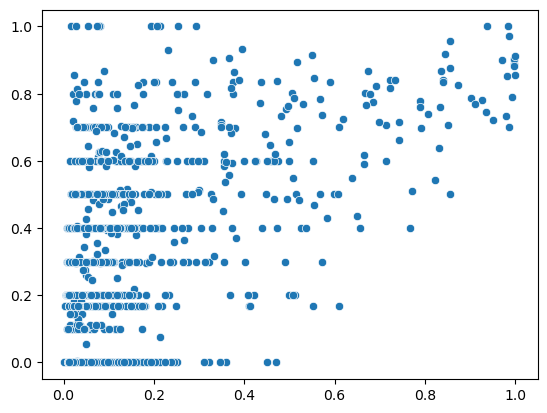

In [8]:
sns.scatterplot(x=scores, y=valid_ds['toxicity'])

In [9]:
test_word_features = word_vectorizer.transform(test_ds['text'])
scores = classifier.predict_proba(test_word_features)[:,1]

In [ ]:
# np.save('scores/ngram', scores)

In [12]:
coefficients = classifier.coef_[0]
coefficients

array([-0.34342756,  0.11686448, -0.65572641, ...,  0.13203531,
       -0.37340225,  0.43245875])

In [23]:
sorted_coef_indices = coefficients.argsort()[::-1]

# Get the names of the most influential features
feature_names = np.array(word_vectorizer.get_feature_names())
most_influential_features = feature_names[sorted_coef_indices][:30]
json.dumps(most_influential_features.tolist())

'["stupid", "idiot", "idiots", "stupidity", "pathetic", "crap", "ignorant", "dumb", "moron", "fools", "fool", "hypocrite", "idiotic", "ass", "damn", "ridiculous", "hypocrites", "jerk", "garbage", "disgusting", "morons", "liar", "clown", "shit", "trash", "loser", "scum", "silly", "losers", "foolish"]'